<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions/Davis-Troller_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Using ggplot

This homework assignment is designed to get you comfortable working with `ggplot` for generating data visualizations.

We will be using the [gapminder](https://cran.r-project.org/web/packages/gapminder/index.html) dataset. It contains  information about population, life expectancy and per capita GDP by country over time.

---
# 1. Color, plot type and layers (6 points)

Install and load the `gapminder` dataset. Look at the first few rows of the data frame.

In [2]:
install.packages("gapminder")
library(gapminder)
head(gapminder)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Now, let's create a basic scatterplot using `ggplot2` that shows how life expectancy has changed over time.

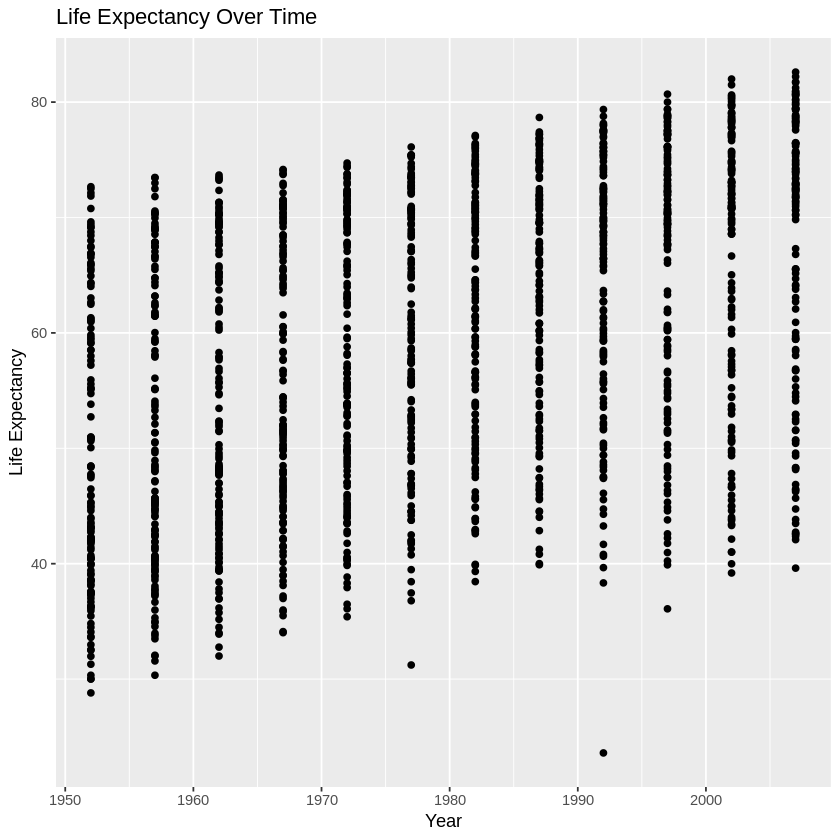

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp))+
  geom_point()+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy")



We can add another layer of detail by using color to indicate continent. Modify the code from the previous question to to do so.

What trends can you identify in the data?

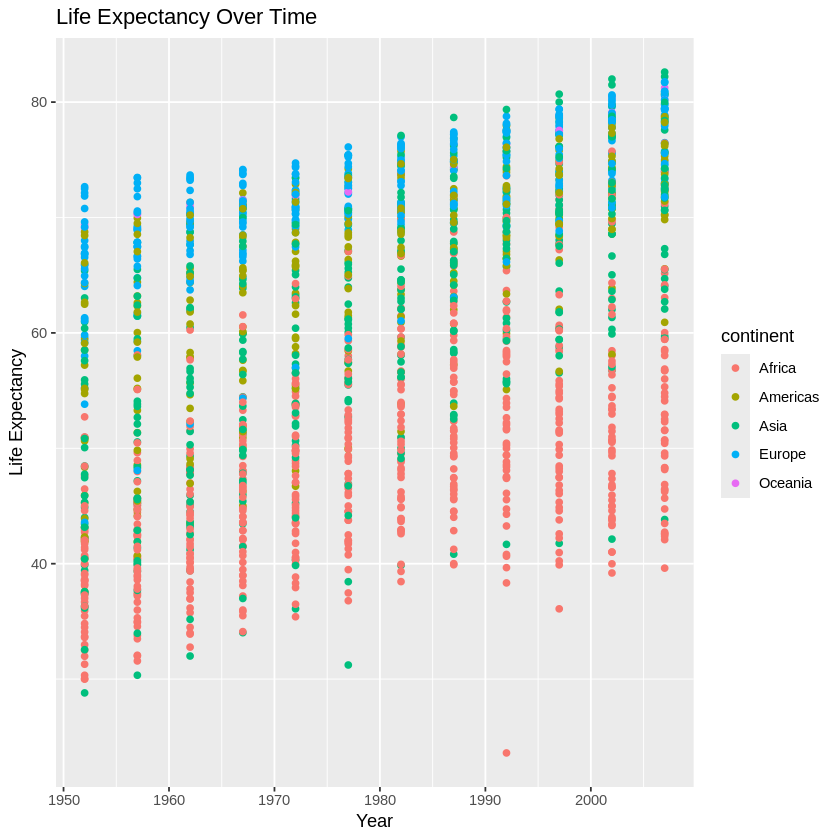

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent))+
  geom_point()+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy")


> *Write your response here.*
> * The general trend is that people from Africa have the lowest life expectancy and people from Europe have the highest life expectancy. People from Asia and the Americas are both in the middle.


Using a scatterplot probably isn’t the best type of plot for effectively visualizing change over time. Instead, modify the code from the previous question to create a line plot.

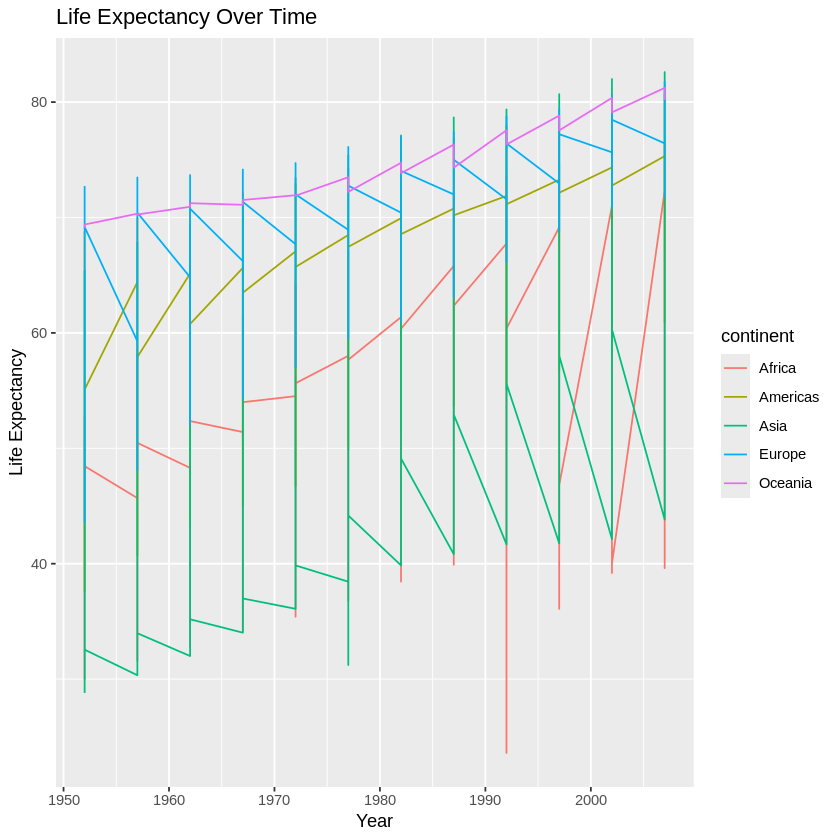

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent))+
  geom_line()+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy")


Hmm, this plot looks a bit weird and unexpected, making it difficult for us to easily interpret the data trends. What is causing this?

> *Write your response here.*
> * geom_line is connecting points without grouping by area. It's connecting the averages of data spanning all continents rather than separating by continent.



Now, let’s try to separate the data by country, plotting one line for each country. Modify the code from the previous plot to do so.

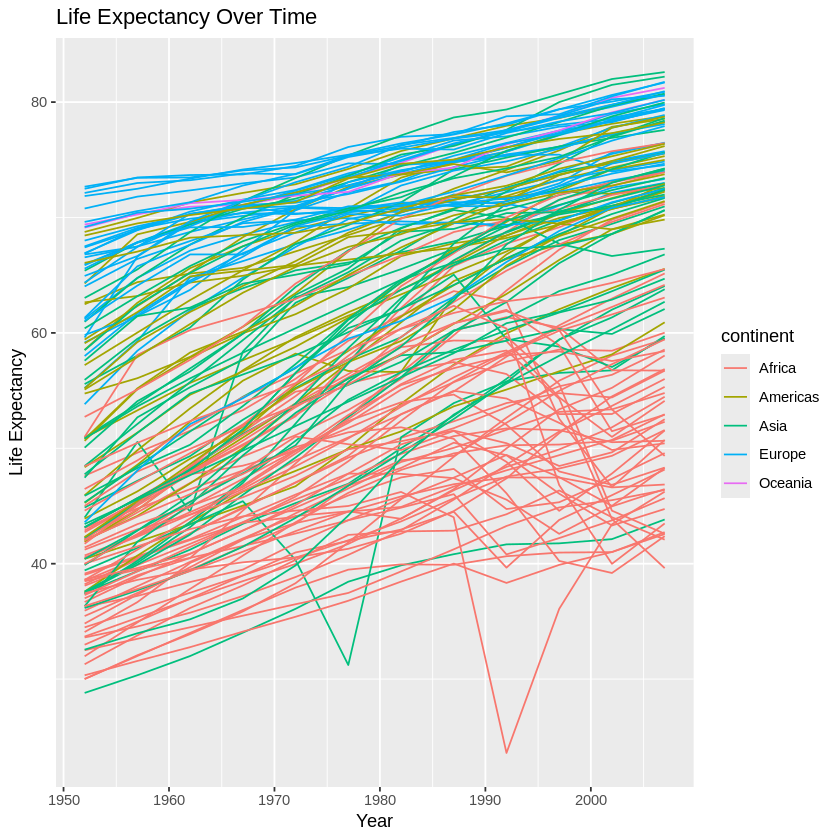

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent, group = country))+
  geom_line()+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy")


But what if we want to visualize both lines and points on our graph? There are two primary ways to do this - taking advantage of what we know about using layers for ggplot (each layer is drawn on top of the previous layer).

* Method 1: Plot black points on top of the colorful lines
* Method 2: Plot black points underneath the colorful lines

Modify the code from the previous question to create two plots, one for each method.

*Hint: to control the color of the points, think about where the aesthetic color attribute should be located e.g., in the global plot options or in a specific layer.*

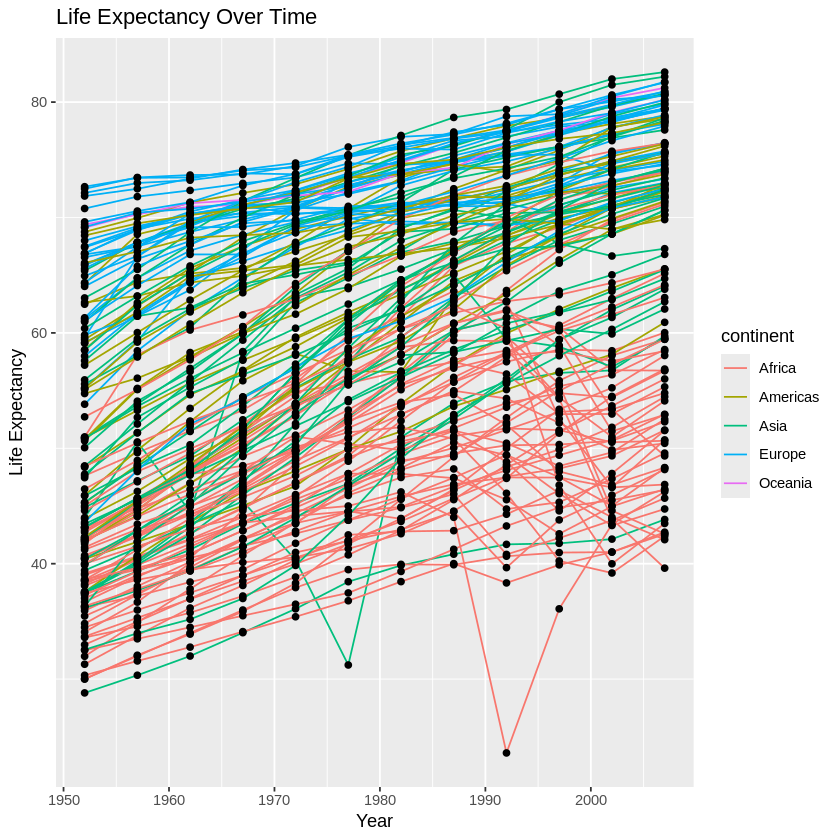

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent, group = country))+
  geom_line()+
  geom_point(color = "black")+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy"
  )


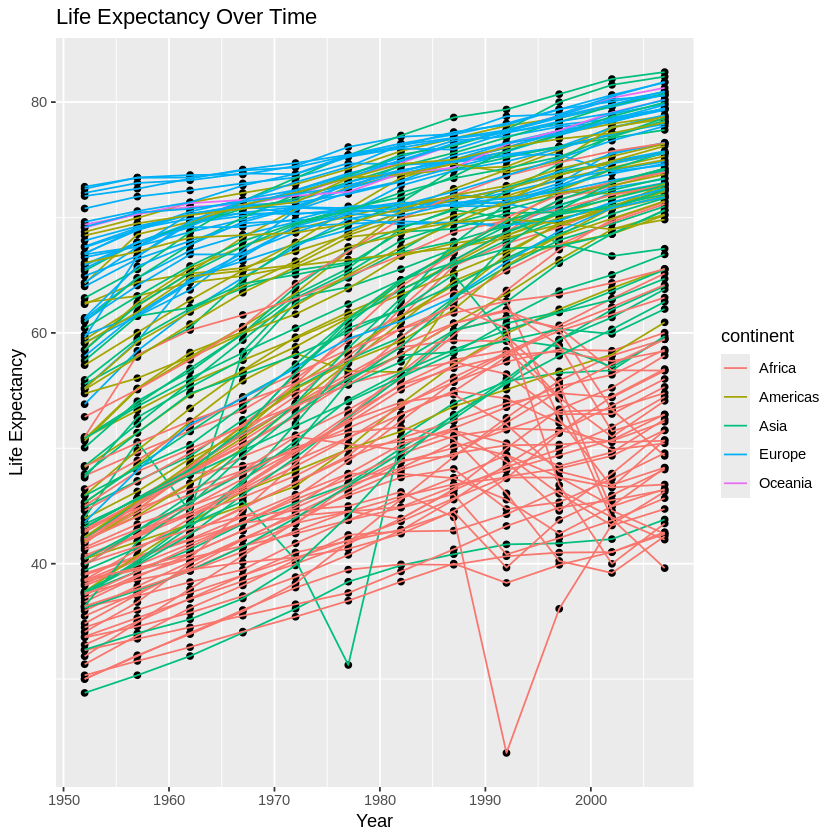

In [ ]:
ggplot(gapminder, aes(x = year, y = lifeExp, color = continent, group = country))+
  geom_point(color = "black")+
  geom_line()+
  labs(
    title = "Life Expectancy Over Time",
    x = "Year",
    y = "Life Expectancy"
  )


---
# 2. Adding statistics (4 points)

`ggplot2` allows easy overlay of statistical models on top of the data.

The graph below shows the relationship between life expectency and GDP per capita:

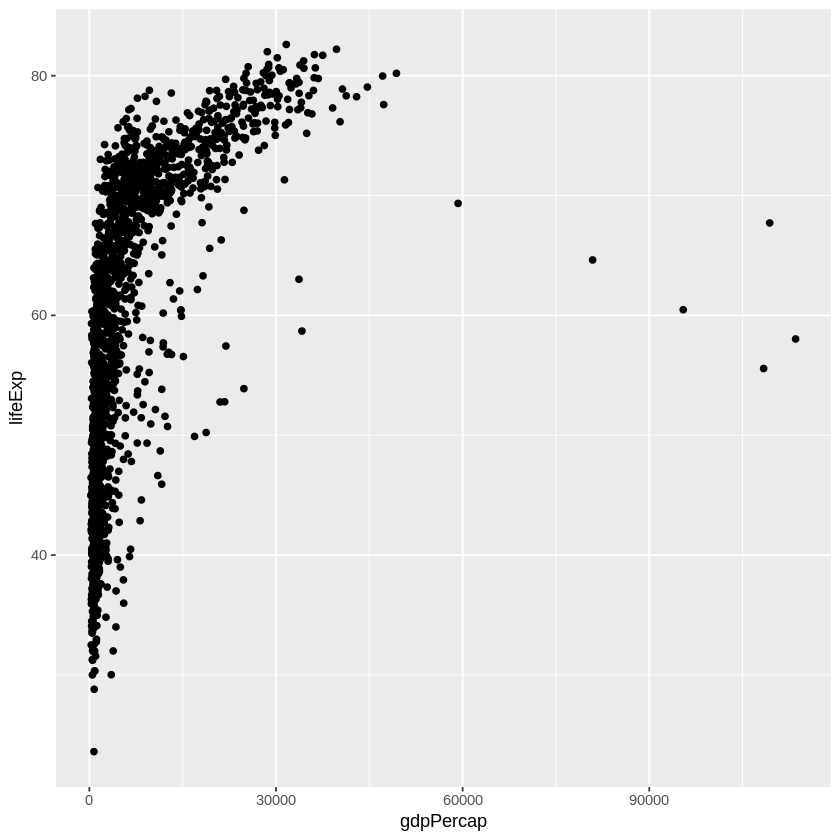

In [ ]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point()

However, the data points are squished close together on the left side of the graph, so it's hard to see the actual relationship we're interested in.

To fix this, we can change the scale of x-axis units using the scale functions. We can also make the data points transparent using the alpha function. This is helpful when there is a large amount of clustered data.

Modify the code above to incorporate these two changes (scale and transparency).

In [1]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.3)+
  scale_to_log10(name = ' GDP per Capita')

ERROR: Error in ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)): could not find function "ggplot"


Already we can more easily visualize the trend in the data.

Next, let's overlay statistics by fiting a simple relationship to the data. Modify the code from the previous question by adding a `geom_smooth` layer.

`geom_smooth()` using formula = 'y ~ x'


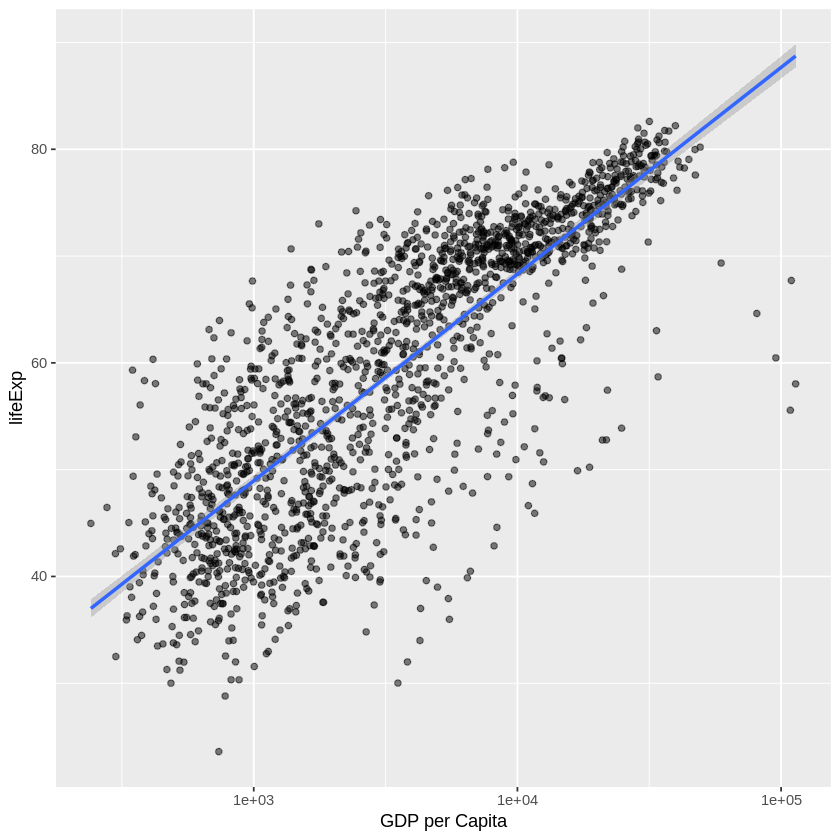

In [6]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp)) +
  geom_point(alpha = 0.5)+
  geom_smooth(method = "lm")+
  scale_x_log10(name = 'GDP per Capita')


Again, we can add a layer of detail by introducing separate colors for each continent. We can also create individual trendlines for each continent, instead of only one trendline.

Modify the code from the previous question to add these elements.


`geom_smooth()` using formula = 'y ~ x'


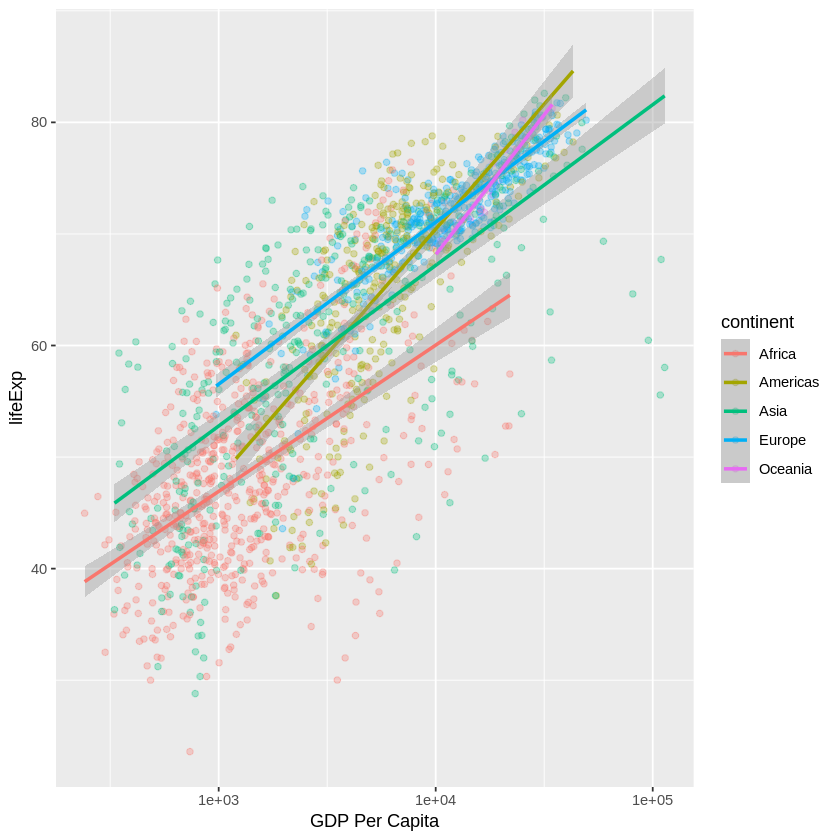

In [10]:
ggplot(data = gapminder, mapping = aes(x = gdpPercap, y = lifeExp, color = continent)) +
  geom_point(alpha = 0.3)+
  geom_smooth(method = "lm")+
  scale_x_log10(name = 'GDP Per Capita')


When you are finished, save the notebook as Exercise5.ipynb, push it to your class GitHub repository and send the instructors a link to your notebook via Canvas.

**DUE:** 5pm EST, Feb 12, 2025

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Meeeeeee*